# **Text to XML**

In [1]:
pip install spacy

In [2]:
# Step 1: Import required libraries
import spacy
import xml.etree.ElementTree as ET
from google.colab import files

# Step 2: Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Step 3: Read the SLA text file
with open("chatgptSLA.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Step 4: Process the text using spaCy
doc = nlp(text)
# Step 5: Extract keywords (nouns and proper nouns, not stop words or punctuation)
keywords = {token.text.lower() for token in doc if token.pos_ in ("NOUN", "PROPN") and not token.is_stop and token.is_alpha}

# Step 6: Format the keywords line
keywords_line = 'keywords={ ' + ", ".join(f'"{kw}"' for kw in sorted(keywords)) + ' }'

# Step 7: Write formatted line to TXT file
output_filename = "Extracted_keywords.txt"
with open(output_filename, "w", encoding="utf-8") as f:
    f.write(keywords_line)

# Step 8: Download the TXT file (for Colab users)
files.download(output_filename)

# Step 9: Print extracted keywords
print("Extracted keywords:")
print(keywords_line)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Extracted keywords:
keywords={ "acme", "agreement", "agreementid", "ar", "auto", "availability", "availabilitybreach", "average", "broadband", "contact", "corp", "coveragearea", "credit", "customer", "customercontact", "days", "deliverymethod", "devices", "downlink", "edge", "effectivedate", "email", "embb", "enhanced", "expirationdate", "fault", "fee", "format", "frequency", "g", "gbps", "general", "hours", "incidentresolutiontime", "incidentresponsetime", "incidents", "information", "iot", "jitter", "latency", "latencybreach", "level", "management", "mbps", "measurementperiod", "metrics", "minutes", "mobile", "monitoring", "ms", "networks", "nextgen", "noc", "pdf", "penalties", "performance", "priority", "provider", "providersupportemail", "recipient", "refund", "region", "release", "remedies", "renewal", "scope", "service", "servicename", "sla", "streaming", "supporteddevices", "target", "termination", "terminationnoticeperiod", "terms", "threshold", "throughput", "time", "uplink", 

In [3]:
import re
import xml.etree.ElementTree as ET

# Load the text
with open("chatgptSLA.txt", "r") as file:
    lines = file.readlines()

# Create root element for XML
root = ET.Element("requirements")

# Define basic patterns to match requirements
patterns = [
    (r"latency.*?(less than|under|<)\s*(\d+\.?\d*)\s*ms", "latency"),
    (r"availability.*?(\d+\.?\d*)\s*%", "availability"),
    (r"jitter.*?(up to|less than|<)\s*(\d+\.?\d*)\s*ms", "jitter")
]

# Process each line
for line in lines:
    print(f"Processing line: {line.strip()}")
    for pattern, req_type in patterns:
        match = re.search(pattern, line, re.IGNORECASE)
        if match:
            print(f" Matched {req_type}: {match.groupdict()}")
            req_elem = ET.SubElement(root, "requirement")
            ET.SubElement(req_elem, "type").text = req_type

            # Safely extract named groups
            value = match.groupdict().get("value")
            operator = match.groupdict().get("operator")

            if value:
                ET.SubElement(req_elem, "constraint").text = value
            else:
                print(" No 'value' group found for match:", match.group())

            if operator:
                req_elem.set("operator", operator)

# Save to XML
tree = ET.ElementTree(root)
tree.write("output.xml", encoding="utf-8", xml_declaration=True)

print(" XML generated as 'output.xml'")


Processing line: **5G Service Level Agreement (SLA)**
Processing line: 
Processing line: **1. General Information**
Processing line: 
Processing line: * **AgreementID**: SLA-5G-001
Processing line: * **Provider**: NextGen Mobile Networks
Processing line: * **Customer**: Acme Corp
Processing line: * **ServiceName**: 5G Enhanced Mobile Broadband (eMBB)
Processing line: * **EffectiveDate**: 2025-07-01
Processing line: * **ExpirationDate**: 2026-06-30
Processing line: 
Processing line: **2. Service Scope**
Processing line: 
Processing line: * **CoverageArea**: Urban and suburban zones in Region-X
Processing line: * **SupportedDevices**: 3GPP Release 16 compliant devices
Processing line: * **UseCases**: Video streaming, AR/VR, industrial IoT
Processing line: 
Processing line: **3. Performance Metrics**
Processing line: 
Processing line: * **Availability**:
Processing line: 
Processing line: * **Target**: 99.99%
Processing line: * **MeasurementPeriod**: Monthly
Processing line: 
Processing l

In [4]:
for token in doc:
    print(f"Token: {token.text}, POS: {token.pos_}, Dependency: {token.dep_}")
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")


Token: *, POS: PUNCT, Dependency: punct
Token: *, POS: NUM, Dependency: punct
Token: 5, POS: NUM, Dependency: nummod
Token: G, POS: PROPN, Dependency: compound
Token: Service, POS: PROPN, Dependency: compound
Token: Level, POS: PROPN, Dependency: compound
Token: Agreement, POS: PROPN, Dependency: ROOT
Token: (, POS: PUNCT, Dependency: punct
Token: SLA, POS: PROPN, Dependency: appos
Token: ), POS: PUNCT, Dependency: punct
Token: *, POS: PUNCT, Dependency: punct
Token: *, POS: PUNCT, Dependency: punct
Token: 

, POS: SPACE, Dependency: dep
Token: *, POS: PUNCT, Dependency: punct
Token: *, POS: NOUN, Dependency: dobj
Token: 1, POS: NUM, Dependency: npadvmod
Token: ., POS: PUNCT, Dependency: punct
Token: General, POS: PROPN, Dependency: compound
Token: Information, POS: PROPN, Dependency: ROOT
Token: *, POS: PUNCT, Dependency: punct
Token: *, POS: PUNCT, Dependency: appos
Token: 

, POS: SPACE, Dependency: dep
Token: *, POS: PUNCT, Dependency: appos
Token: *, POS: PUNCT, Dependency: appos


In [5]:
keywords={"agreement", "agreementid", "auto", "availability", "availabilitybreach", "average", "broadband", "contact",
          "corp", "coveragearea", "credit", "customer", "customercontact", "days", "deliverymethod", "devices", "downlink",
          "edge", "effectivedate", "email", "embb", "enhanced", "expirationdate", "fault", "fee", "format", "frequency", "gbps",
          "hours", "incidentresolutiontime", "incidentresponsetime", "incidents", "information", "jitter", "latency", "latencybreach",
          "level", "management", "mbps", "measurementperiod", "metrics", "minutes", "mobile", "monitoring", "ms", "networks",
          "penalties", "performance", "priority", "provider", "providersupportemail", "recipient", "refund", "region",
          "release", "renewal", "scope", "service", "servicename", "sla", "streaming", "supporteddevices", "target", "termination",
          "terminationnoticeperiod", "terms", "threshold", "throughput", "time", "uplink"}


for token in doc:
    if token.text.lower() in keywords:
        print(f"\nKeyword: {token.text}")
        for child in token.children:
            print(f"  -> Child: {child.text} ({child.dep_}, {child.pos_})")
        for ancestor in token.ancestors:
            print(f"  <- Ancestor: {ancestor.text} ({ancestor.dep_}, {ancestor.pos_})")



Keyword: Service
  <- Ancestor: Level (compound, PROPN)
  <- Ancestor: Agreement (ROOT, PROPN)

Keyword: Level
  -> Child: Service (compound, PROPN)
  <- Ancestor: Agreement (ROOT, PROPN)

Keyword: Agreement
  -> Child: * (punct, PUNCT)
  -> Child: * (punct, NUM)
  -> Child: 5 (nummod, NUM)
  -> Child: G (compound, PROPN)
  -> Child: Level (compound, PROPN)
  -> Child: ( (punct, PUNCT)
  -> Child: SLA (appos, PROPN)
  -> Child: ) (punct, PUNCT)
  -> Child: * (punct, PUNCT)
  -> Child: * (punct, PUNCT)
  -> Child: * (punct, PUNCT)
  -> Child: * (dobj, NOUN)
  -> Child: 1 (npadvmod, NUM)
  -> Child: . (punct, PUNCT)

Keyword: SLA
  <- Ancestor: Agreement (ROOT, PROPN)

Keyword: Information
  -> Child: General (compound, PROPN)
  -> Child: * (punct, PUNCT)
  -> Child: * (appos, PUNCT)
  -> Child: * (appos, PUNCT)
  -> Child: * (appos, PUNCT)
  -> Child: * (punct, PUNCT)
  -> Child: AgreementID (appos, NOUN)
  -> Child: * (punct, PUNCT)
  -> Child: * (appos, PUNCT)
  -> Child: : (punct, P

In [6]:
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")

Entity: 5, Label: CARDINAL
Entity: 1, Label: CARDINAL
Entity: Acme Corp, Label: ORG
Entity: 5, Label: CARDINAL
Entity: 2025-07-01, Label: DATE
Entity: 2026-06-30, Label: DATE
Entity: 2, Label: CARDINAL
Entity: 3GPP Release, Label: ORG
Entity: 16, Label: CARDINAL
Entity: AR/VR, Label: ORG
Entity: IoT, Label: ORG
Entity: 3, Label: CARDINAL
Entity: 99.99%, Label: PERCENT
Entity: Monthly, Label: DATE
Entity: ≤, Label: PERSON
Entity: Continuous, Label: PERSON
Entity: ≥, Label: PERSON
Entity: 1 Gbps
  *, Label: QUANTITY
Entity: ≥, Label: PERSON
Entity: Mbps
  *, Label: PERSON
Entity: Peak hours, Label: TIME
Entity: 17:00–21:00, Label: CARDINAL
Entity: 4, Label: CARDINAL
Entity: Fault Management**, Label: ORG
Entity: ≤, Label: PERSON
Entity: 15 minutes, Label: TIME
Entity: ≤, Label: PERSON
Entity: 4 hours, Label: TIME
Entity: 1, Label: CARDINAL
Entity: 24/7, Label: CARDINAL
Entity: NOC, Label: ORG
Entity: 5, Label: CARDINAL
Entity: 99.5%, Label: PERCENT
Entity: 10%, Label: PERCENT
Entity: mon

In [7]:
from spacy.matcher import Matcher
from collections import defaultdict

# Assume: `doc = nlp(text)` is already run
matcher = Matcher(nlp.vocab)

# --- Define static patterns ---
availability_pattern = [
    {'LIKE_NUM': True}, {'TEXT': '%'}, {'LOWER': 'uptime'}
]
response_time_pattern = [
    {'LOWER': 'response'}, {'LOWER': 'time'}, {'LOWER': 'should'},
    {'LOWER': 'not'}, {'LOWER': 'exceed'}, {'LIKE_NUM': True}, {'LOWER': 'hours'}
]

matcher.add('AVAILABILITY', [availability_pattern])
matcher.add('RESPONSE_TIME', [response_time_pattern])

# --- Add keyword dynamic patterns ---
keywords={"agreement", "agreementid", "auto", "availability", "availabilitybreach", "average", "broadband", "contact",
          "corp", "coveragearea", "credit", "customer", "customercontact", "days", "deliverymethod", "devices", "downlink",
          "edge", "effectivedate", "email", "embb", "enhanced", "expirationdate", "fault", "fee", "format", "frequency", "gbps",
          "hours", "incidentresolutiontime", "incidentresponsetime", "incidents", "information", "jitter", "latency", "latencybreach",
          "level", "management", "mbps", "measurementperiod", "metrics", "minutes", "mobile", "monitoring", "ms", "networks",
          "penalties", "performance", "priority", "provider", "providersupportemail", "recipient", "refund", "region",
          "release", "renewal", "scope", "service", "servicename", "sla", "streaming", "supporteddevices", "target", "termination",
          "terminationnoticeperiod", "terms", "threshold", "throughput", "time", "uplink"}

for kw in keywords:
    matcher.add(f"KEYWORD_{kw.lower()}", [[{"LOWER": kw.lower()}]])

# --- Apply matcher ---
matches = matcher(doc)

# --- Initialize storage ---
availability = None
response_time = None
matched_keywords = defaultdict(list)

# --- Process matches ---
for match_id, start, end in matches:
    span = doc[start:end]
    match_label = nlp.vocab.strings[match_id]

    if match_label == 'AVAILABILITY':
        availability = span.text
    elif match_label == 'RESPONSE_TIME':
        response_time = span.text
    elif match_label.startswith("KEYWORD_"):
        keyword = span.text.lower()

        # Look for number or units around the keyword
        window_start = max(0, start - 3)
        window_end = min(len(doc), end + 4)
        context = doc[window_start:window_end]

        # Look for nearby values: numbers, %, ms, etc.
        values = [
            token.text for token in context
            if token.like_num or token.text.lower() in {'%', 'ms', 'mbps', 'milliseconds', 'minutes', 'hours', 'ratio'}
        ]

        if values:
            matched_keywords[keyword].extend(values)

# --- Print results ---
print(f"Availability Match: {availability}")
print(f"Response Time Match: {response_time}\n")

print("Keyword-Value Pairs Found in Text:")
for kw, vals in sorted(matched_keywords.items()):
    vals_clean = ", ".join(set(vals))  # Remove duplicates
    print(f"- {kw}: {vals_clean}")


Availability Match: None
Response Time Match: None

Keyword-Value Pairs Found in Text:
- average: ms, 10
- contact: 7
- credit: 5, 10
- days: 30
- devices: 16
- edge: 5, ms
- effectivedate: 2025
- enhanced: 5
- expirationdate: 2026
- fault: 4
- fee: 6, 5, %, 10
- gbps: 1
- hours: 1, hours, 4
- incidents: 1
- information: 7, 1
- level: 5
- management: 4
- mbps: 500, Mbps
- metrics: 3
- minutes: minutes, 15
- mobile: 5
- monitoring: 24/7, 5
- ms: 10, 5, ms
- penalties: 5
- performance: 3
- priority: hours, 1, 4
- recipient: 7
- refund: %
- release: 16
- scope: 2
- service: 5, 2
- servicename: 5
- target: 99.99
- terminationnoticeperiod: 30
- terms: 8


In [8]:
for keyword in keywords:
    words = keyword.lower().split()
    pattern = [{'LOWER': word.strip(",")} for word in words]
    matcher.add(keyword.upper().replace(" ", "_"), [pattern])

# Apply the matcher
matches = matcher(doc)

# Print matches
for match_id, start, end in matches:
    span = doc[start:end]
    print(f"Matched '{span.text}' with label '{nlp.vocab.strings[match_id]}' at position {start}-{end}")

Matched 'Service' with label 'KEYWORD_service' at position 4-5
Matched 'Service' with label 'SERVICE' at position 4-5
Matched 'Level' with label 'KEYWORD_level' at position 5-6
Matched 'Level' with label 'LEVEL' at position 5-6
Matched 'Agreement' with label 'KEYWORD_agreement' at position 6-7
Matched 'Agreement' with label 'AGREEMENT' at position 6-7
Matched 'SLA' with label 'KEYWORD_sla' at position 8-9
Matched 'SLA' with label 'SLA' at position 8-9
Matched 'Information' with label 'KEYWORD_information' at position 18-19
Matched 'Information' with label 'INFORMATION' at position 18-19
Matched 'AgreementID' with label 'KEYWORD_agreementid' at position 25-26
Matched 'AgreementID' with label 'AGREEMENTID' at position 25-26
Matched 'Provider' with label 'KEYWORD_provider' at position 34-35
Matched 'Provider' with label 'PROVIDER' at position 34-35
Matched 'Mobile' with label 'KEYWORD_mobile' at position 39-40
Matched 'Mobile' with label 'MOBILE' at position 39-40
Matched 'Networks' with 

In [9]:
# Optional: define custom overrides for certain proper nouns
custom_lemma_map = {
    "Licensor": "license",
    "Licensee": "license"
}

# Print tokens and their lemmas
for token in doc:
    if token.text in custom_lemma_map:
        lemma = custom_lemma_map[token.text]
    else:
        lemma = token.lemma_
    print(f"Token: {token.text} -> Lemma: {lemma}")


Token: * -> Lemma: *
Token: * -> Lemma: *
Token: 5 -> Lemma: 5
Token: G -> Lemma: G
Token: Service -> Lemma: Service
Token: Level -> Lemma: Level
Token: Agreement -> Lemma: Agreement
Token: ( -> Lemma: (
Token: SLA -> Lemma: SLA
Token: ) -> Lemma: )
Token: * -> Lemma: *
Token: * -> Lemma: *
Token: 

 -> Lemma: 


Token: * -> Lemma: *
Token: * -> Lemma: *
Token: 1 -> Lemma: 1
Token: . -> Lemma: .
Token: General -> Lemma: General
Token: Information -> Lemma: Information
Token: * -> Lemma: *
Token: * -> Lemma: *
Token: 

 -> Lemma: 


Token: * -> Lemma: *
Token: * -> Lemma: *
Token: * -> Lemma: *
Token: AgreementID -> Lemma: agreementid
Token: * -> Lemma: *
Token: * -> Lemma: *
Token: : -> Lemma: :
Token: SLA-5G-001 -> Lemma: SLA-5G-001
Token: 
 -> Lemma: 

Token: * -> Lemma: *
Token: * -> Lemma: *
Token: * -> Lemma: *
Token: Provider -> Lemma: provider
Token: * -> Lemma: *
Token: * -> Lemma: *
Token: : -> Lemma: :
Token: NextGen -> Lemma: NextGen
Token: Mobile -> Lemma: Mobile
Token: Net

In [10]:
import xml.etree.ElementTree as ET

# Create root XML element
root = ET.Element("keywords")

# Populate XML with keywords and values
for kw, values in matched_keywords.items():
    keyword_elem = ET.SubElement(root, "keyword", name=kw)
    for val in set(values):  # Use set() to avoid duplicates
        ET.SubElement(keyword_elem, "value").text = val

# Save to file
tree = ET.ElementTree(root)
output_filename = "chatgptSLA_keyword_values.xml"
tree.write(output_filename, encoding="utf-8", xml_declaration=True)

# Optional: Pretty print to console
xml_str = ET.tostring(root, encoding="unicode")
print("\nGenerated XML:\n")
print(xml_str)



Generated XML:

<keywords><keyword name="service"><value>5</value><value>2</value></keyword><keyword name="level"><value>5</value></keyword><keyword name="information"><value>7</value><value>1</value></keyword><keyword name="servicename"><value>5</value></keyword><keyword name="enhanced"><value>5</value></keyword><keyword name="mobile"><value>5</value></keyword><keyword name="effectivedate"><value>2025</value></keyword><keyword name="expirationdate"><value>2026</value></keyword><keyword name="scope"><value>2</value></keyword><keyword name="release"><value>16</value></keyword><keyword name="devices"><value>16</value></keyword><keyword name="performance"><value>3</value></keyword><keyword name="metrics"><value>3</value></keyword><keyword name="target"><value>99.99</value></keyword><keyword name="ms"><value>10</value><value>5</value><value>ms</value></keyword><keyword name="edge"><value>5</value><value>ms</value></keyword><keyword name="gbps"><value>1</value></keyword><keyword name="mbps

In [11]:
import time
import matplotlib.pyplot as plt

# Create a temporary matcher to test individual keyword timing
timings = []

for kw in sorted(keywords):
    temp_matcher = Matcher(nlp.vocab)
    temp_matcher.add("KEYWORD_TEMP", [[{"LOWER": kw.lower()}]])

    start_time = time.perf_counter()
    temp_matcher(doc)
    elapsed_time = time.perf_counter() - start_time

    timings.append((kw, elapsed_time))


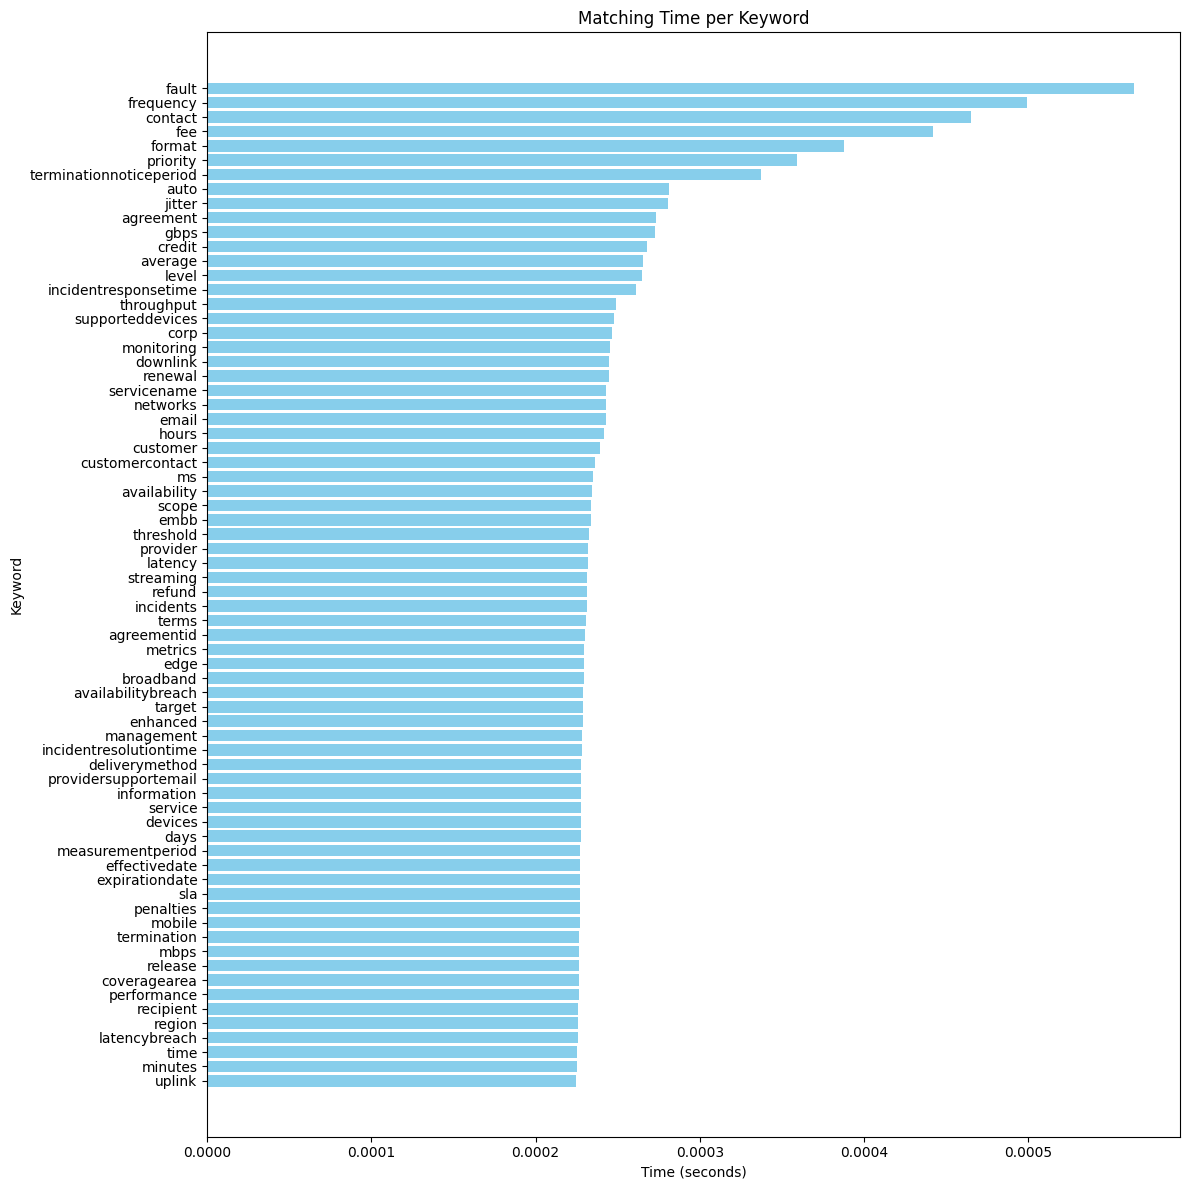

In [12]:
# Sort by time
timings.sort(key=lambda x: x[1], reverse=True)

# Prepare data
keywords_sorted, times_sorted = zip(*timings)

# Plot
plt.figure(figsize=(12, 12))
plt.barh(keywords_sorted, times_sorted, color="skyblue")
plt.xlabel("Time (seconds)")
plt.ylabel("Keyword")
plt.title("Matching Time per Keyword")
plt.gca().invert_yaxis()  # Show slowest at the top
plt.tight_layout()
plt.show()


In [13]:
docs = text.split("\n\n")  # Assuming paragraphs are separated by double newlines

total_docs = len(docs)
docs_with_matches = 0

for para in docs:
    doc = nlp(para)
    matches = matcher(doc)
    if matches:
        docs_with_matches += 1

match_rate = (docs_with_matches / total_docs) * 100
print(f"Match Rate: {match_rate:.2f}%")


Match Rate: 96.15%


In [14]:
import time

total_time = 0.0
# time per match (not per doc), if per doc , set to 0 : match_counts=0
match_counts = len(matches)

for para in docs:
    doc = nlp(para)

    start = time.perf_counter()
    matches = matcher(doc)
    end = time.perf_counter()

    total_time += (end - start)
    match_counts += 1  # or only count if matches found: if matches: match_counts += 1

avg_time_per_match = total_time / match_counts if match_counts > 0 else 0
print(f"Average Time per Match: {avg_time_per_match:.6f} seconds")


Average Time per Match: 0.000071 seconds


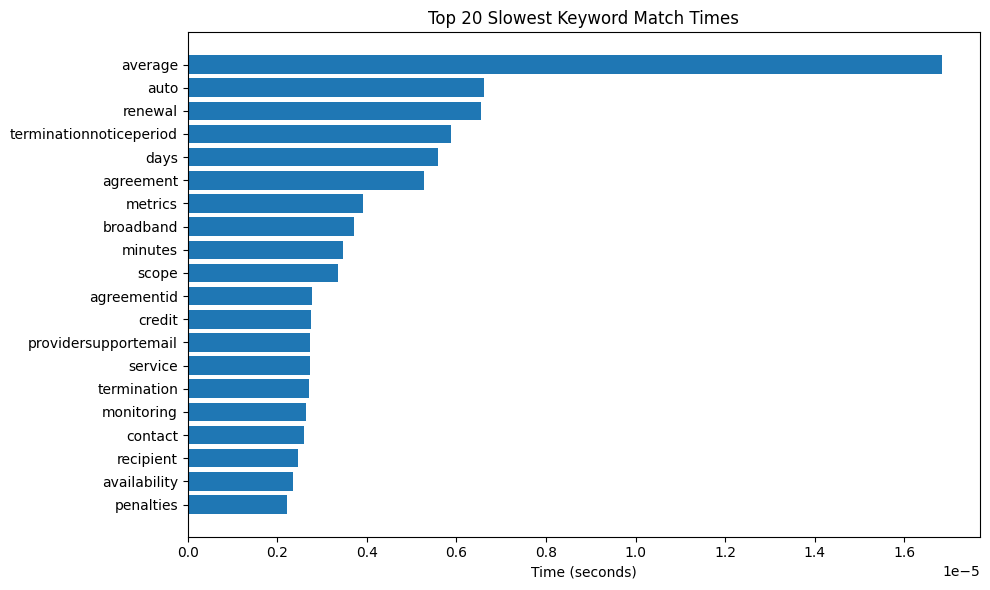

In [15]:
# Create PhraseMatcher
from spacy.matcher import PhraseMatcher
timings = []
for kw in sorted(keywords):
    matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
    keyword_doc = nlp.make_doc(kw)
    matcher.add("KEYWORD", [keyword_doc])

    start_time = time.perf_counter()
    matches = matcher(doc)
    elapsed_time = time.perf_counter() - start_time

    timings.append((kw, elapsed_time))

# (Optional) Sort by elapsed time
timings.sort(key=lambda x: x[1], reverse=True)

# (Optional) Plot top 20 slowest
top_k = 20
top_timings = timings[:top_k]
keywords_top = [x[0] for x in top_timings]
times_top = [x[1] for x in top_timings]

plt.figure(figsize=(10, 6))
plt.barh(keywords_top[::-1], times_top[::-1])
plt.xlabel("Time (seconds)")
plt.title(f"Top {top_k} Slowest Keyword Match Times")
plt.tight_layout()
plt.show()

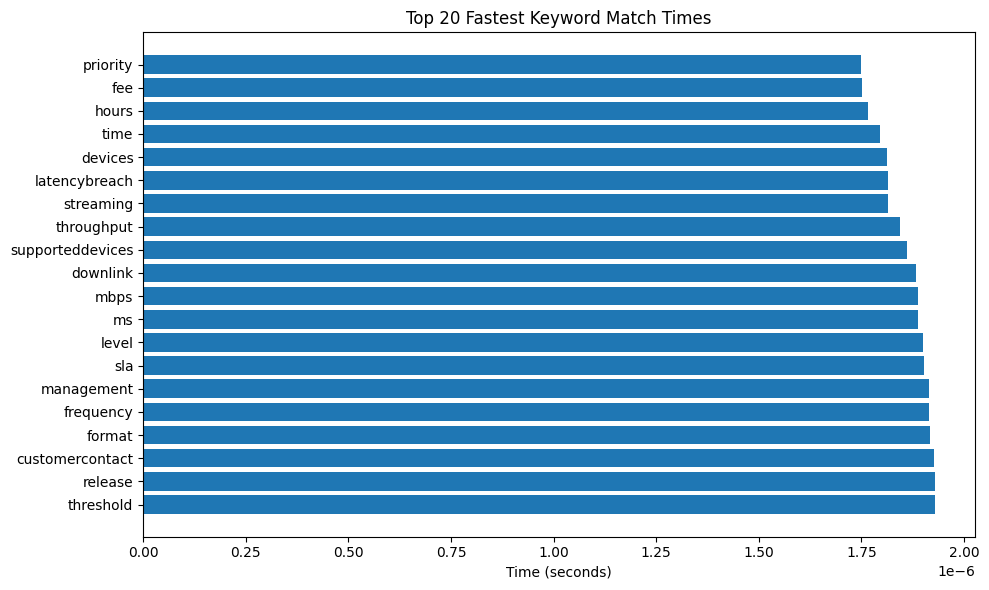

In [16]:
# Sort timings by elapsed time (ascending = fastest first)
timings.sort(key=lambda x: x[1])  # No reverse

# Get the 20 fastest matches
top_k = 20
fastest_timings = timings[:top_k]
keywords_top = [x[0] for x in fastest_timings]
times_top = [x[1] for x in fastest_timings]

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(keywords_top[::-1], times_top[::-1])  # Reverse for top-down plot
plt.xlabel("Time (seconds)")
plt.title(f"Top {top_k} Fastest Keyword Match Times")
plt.tight_layout()
plt.show()

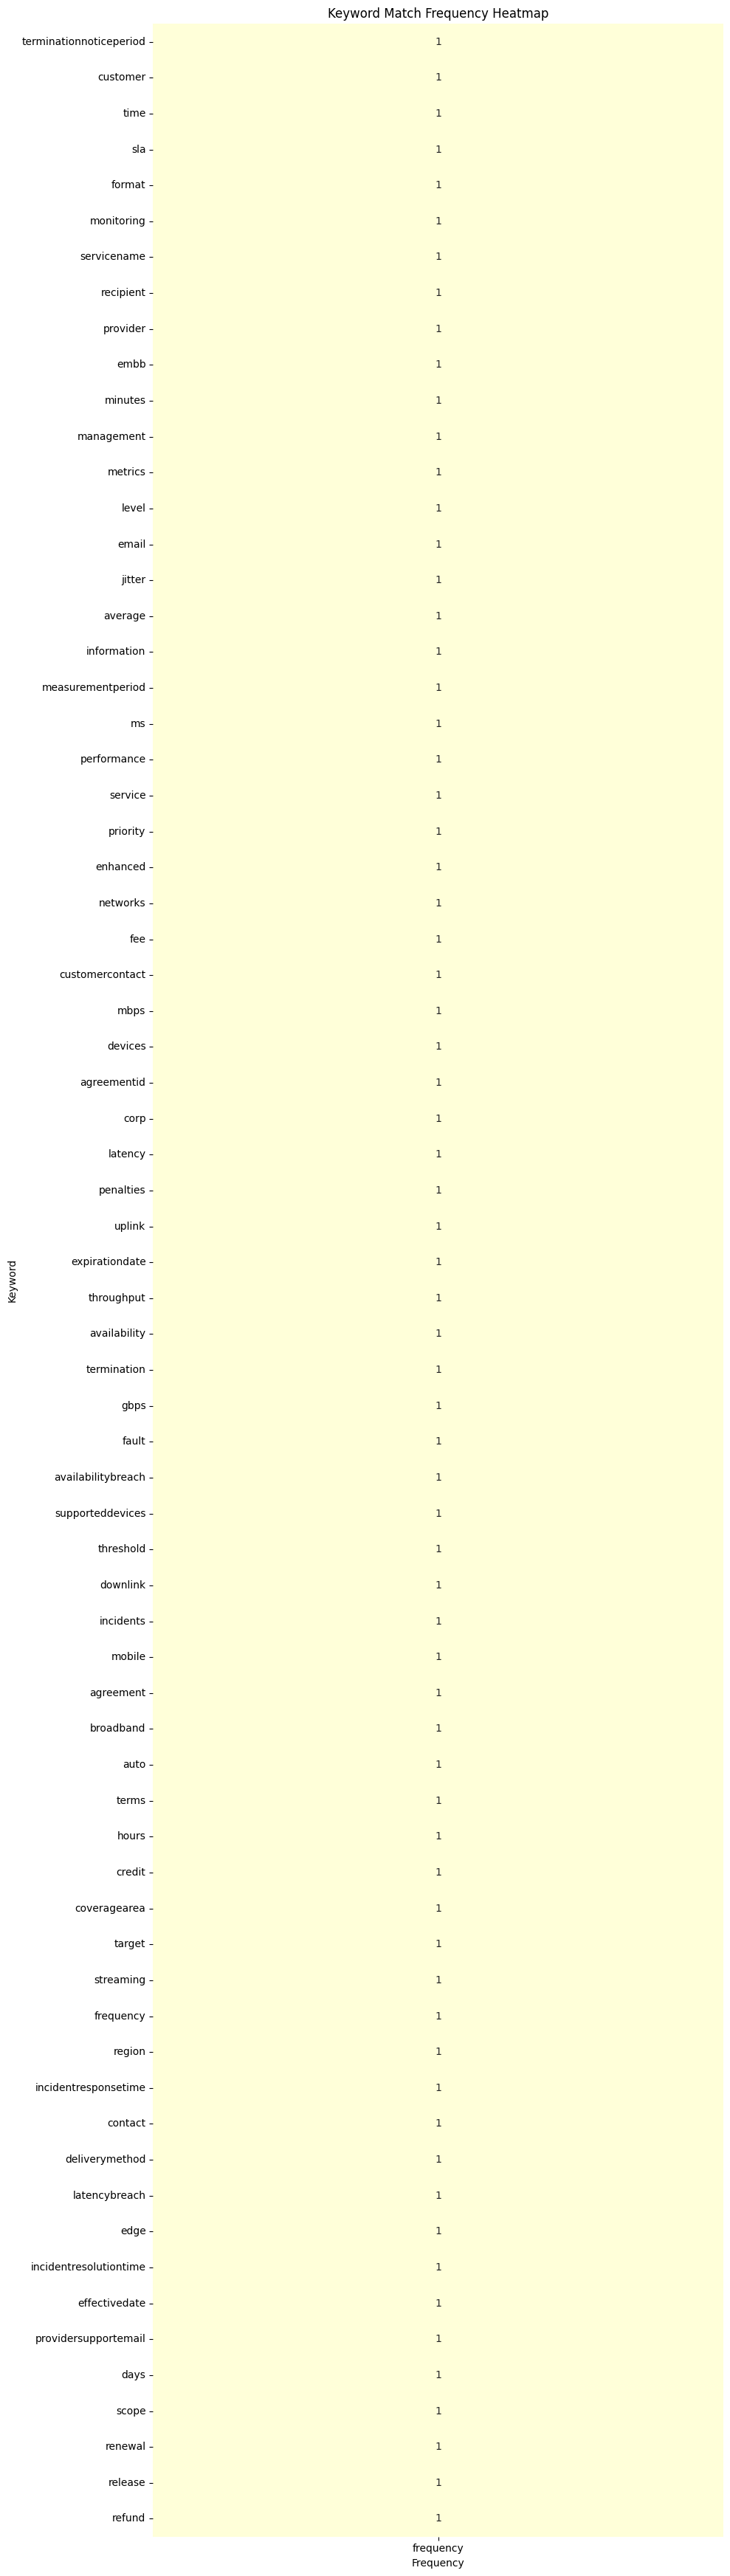

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

# Count matches per keyword
keyword_counts = Counter(keywords)

# Make sure the matcher has been defined and doc exists
if 'matcher' in locals() and 'doc' in locals():
    for match_id, start, end in matcher(doc):
        label = nlp.vocab.strings[match_id]
        if label.startswith("KEYWORD_"):
            keyword = label.replace("KEYWORD_", "")
            keyword_counts[keyword] += 1

# Convert to DataFrame
if keyword_counts:
    df = pd.DataFrame.from_dict(keyword_counts, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)

    plt.figure(figsize=(10, len(df) * 0.5))
    sns.heatmap(df, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
    plt.title("Keyword Match Frequency Heatmap")
    plt.xlabel("Frequency")
    plt.ylabel("Keyword")
    plt.tight_layout()
    plt.show()
else:
    print("No keyword matches found. Heatmap not generated.")


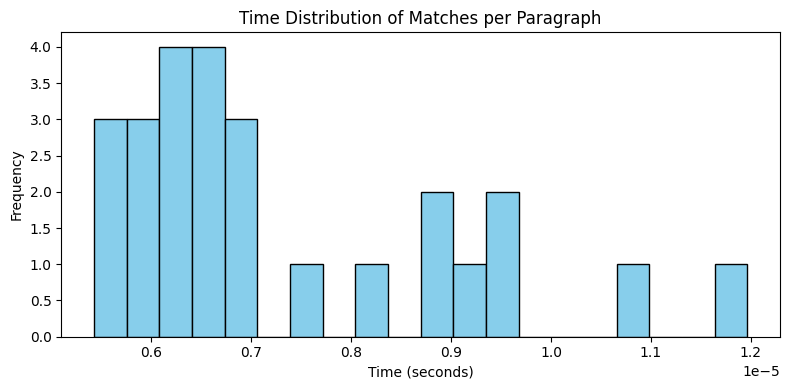

In [18]:
import time

timings = []

for para in text.split("\n\n"):  # or other sections
    doc = nlp(para)
    start = time.perf_counter()
    matcher(doc)
    end = time.perf_counter()
    timings.append(end - start)

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(timings, bins=20, color="skyblue", edgecolor="black")
plt.title("Time Distribution of Matches per Paragraph")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [19]:
# Span Overlap Visualization (with displacy)
# spaCy's built-in displacy visualizer to highlight matched spans

from spacy import displacy

# Get matches and convert to "entities" for displacy
ents = []

for match_id, start, end in matcher(doc):
    label = nlp.vocab.strings[match_id]
    span = doc[start:end]
    ents.append({
        "start": span.start_char,
        "end": span.end_char,
        "label": label.replace("KEYWORD_", "")
    })

# Render visualization
doc_user_data = {"text": doc.text, "ents": ents, "title": None}
displacy.render(doc_user_data, style="ent", manual=True, jupyter=True)


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define your sets
ground_truth={ "access", "agreement", "agreementid", "annual", "appendix", "applications","area", "audit", "auto", "availability", "availabilitybreach", "average", "basic", "breach", "broadband", "calendar", "capabilities",  "channels", "claim", "client",  "communication", "computing", "conditions", "confidentiality", "connectivity", "contact",  "coverage", "credit",  "critical", "customer", "customercontact", "cycle", "daily", "dashboard", "data", "date", "days", "definition", "degradation", "delay", "delivery", "deliverymethod", "description", "deviation", "device", "devices", "dispute", "disputes", "downlink", "downtime", "edge", "effective", "effectivedate", "effort", "egress", "email", "embb", "end", "enhanced", "enterprise", "equipment", "esim", "event", "exclusions", "expirationdate", "fault", "faults", "fee", "file", "format", "formula", "frequency", "function", "functioning", "g", "gateway", "gateways", "gbps", "general", "geographic", "gigabits", "governing", "guaranteed", "helpdesk", "high", "hour", "hourly", "hours", "id", "ids", "incident", "incidentresolutiontime", "incidentresponsetime", "incidents", "industrial", "information", "infrastructure", "ingress", "inquiries", "installation", "intervals", "invoice", "issues", "jitter", "jurisdiction", "kpi", "latency", "latencybreach", "law", "level", "levels", "locations", "loss", "low", "maintenance", "major", "management", "map", "maps", "master", "max", "maximum", "mbps", "measurement", "measurementperiod", "measurements", "mediation", "medium", "method", "metric", "metrics", "metropolitan", "milliseconds", "min", "minimum", "minor", "minute", "minutes", "mobile", "monitor", "monitoring", "month", "monthly", "months", "ms", "negotiation", "network", "networks", "new", "nexgen", "nextgen", "notice", "notification", "notify", "objective", "objectives", "online", "outage", "packet", "parties", "party", "pdf", "peak", "penalties", "penalty", "percentage", "percentile", "performance", "period", "phone", "plane", "planned", "pm", "point", "policy", "portal", "premises", "premium", "prioritization", "priority", "probes", "profiles", "provider", "providersupportemail", "provision", "quarterly", "radio", "rate", "receipt", "recipient", "refund", "region", "release", "reliability", "remedies", "renewal", "report", "reporting", "reports", "requirements", "resolution", "respond", "response", "responsibilities", "restoration", "review", "rights", "round","scope", "segment", "service", "servicename", "sim", "sla", "slices", "slos", "smartphones", "solutions", "specific", "speed", "status", "streaming", "subset", "support", "supporteddevices", "tablets", "target", "technology", "telco", "telecom", "termination", "terminationnoticeperiod", "terms", "tests", "threshold", "throughput", "tickets", "tiers", "time", "tolerated", "tools", "total", "tracking", "traffic", "transfers", "trip", "trt", "type", "ue", "ues", "updates", "upf", "uplink", "uptime", "usage", "usecases", "user", "users", "workdays", "writing", "zone", "zones" }


# predicted_keywords = {"latency", "jitter", "loss", "signal"}        # from the matcher
predicted_keywords = keywords

# Build the union set of all unique keywords seen
all_keywords = sorted(ground_truth.union(predicted_keywords))

# Create binary vectors
y_true = [1 if kw in ground_truth else 0 for kw in all_keywords]
y_pred = [1 if kw in predicted_keywords else 0 for kw in all_keywords]

# Now compute scores
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9714285714285714
Recall: 0.2595419847328244
F1 Score: 0.40963855421686746


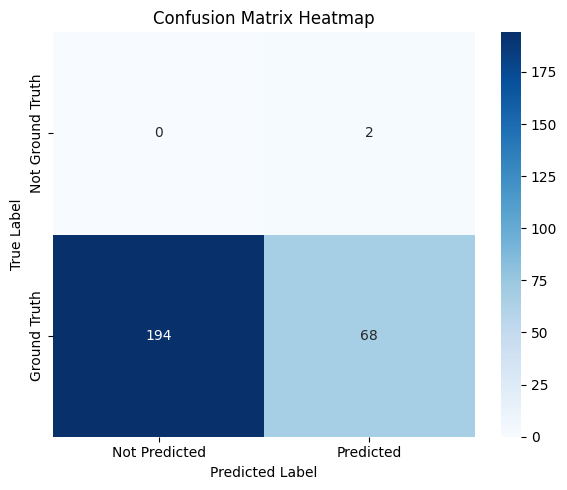

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Predicted', 'Predicted'],
            yticklabels=['Not Ground Truth', 'Ground Truth'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()


# **large English NLP model provided by spaCy**

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 3.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
from google.colab import files

# Load the large English model with word vectors
nlp = spacy.load("en_core_web_lg")


# Step 3: Read the SLA text file
with open("chatgptSLA.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Step 4: Process the text using spaCy
doc = nlp(text)


# SLA-related keywords to compare against
keywords = {"applications", "availability", "cells", "communication", "core", "data", "day", "db",
    "devices", "downlink", "environments", "fault", "g", "handover", "hours", "jitter",
    "latency", "loss", "mbps", "milliseconds", "minutes", "mission", "network", "noise",
    "peak", "period", "rate", "ratio", "requests", "restoration", "service", "services",
    "session", "setup", "signal", "snr", "streaming", "throughput", "time", "urllc",
    "user", "video", "latency", "throughput", "reliability", "availability", "jitter", "packet", "loss", "qos",
    "acceptance", "notifies", "Business Days", "requirements", "obligations", "agreement" ,"acme", "agreement",
    "agreementid", "auto", "availability", "availabilitybreach", "average",
  "broadband", "contact", "corp", "coveragearea", "credit", "customer", "customercontact", "days",
    "deliverymethod", "devices", "downlink", "edge", "effectivedate", "elements", "email", "embb", "enhanced",
    "expirationdate", "fault", "fee", "format", "frequency", "gbps", "general", "hours", "incidentresolutiontime",
    "incidentresponsetime", "incidents", "information", "iot", "jitter", "latency", "latencybreach", "level",
    "management", "mbps", "measurementperiod", "metrics", "minutes", "mobile", "monitoring", "ms", "networks",
    "nextgen", "noc", "parts", "pdf", "penalties", "performance", "priority", "provider", "providersupportemail",
    "recipient", "refund", "region", "release", "remedies", "renewal", "sample", "scope", "service", "servicename",
    "sla", "streaming", "supporteddevices", "target", "termination", "terminationnoticeperiod", "terms",
    "threshold", "throughput", "time", "uplink", "usecases", "video", "zones" }
# keywords = [
#     "latency", "throughput", "reliability", "availability", "jitter",
#     "packet", "loss", "qos", "acceptance", "notifies",
#     "Business Days", "requirements", "obligations", "agreement"
# ]

# Convert keywords to spaCy tokens (handle phrases properly)
keyword_tokens = {kw: nlp(kw)[0] if len(nlp(kw)) == 1 else nlp(kw) for kw in keywords}


# Compare each token in the doc to each keyword
for token in doc:
    if token.has_vector:
        for kw, kw_token in keyword_tokens.items():
            if isinstance(kw_token, spacy.tokens.Token):
                # Single-word keyword
                similarity = token.similarity(kw_token)
            else:
                # Multi-word keyword (e.g., "Business Days") — average similarity
                similarity = sum(token.similarity(t) for t in kw_token) / len(kw_token)

            if similarity > 0.6:
                print(f"Doc token '{token.text}' is similar to keyword '{kw}' (Similarity: {similarity:.2f})")


/tmp/ipython-input-31-3361211454.py:50: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  similarity = token.similarity(kw_token)


Doc token 'Sure' is similar to keyword 'time' (Similarity: 0.64)
Doc token 'sample' is similar to keyword 'sample' (Similarity: 1.00)
Doc token 'G' is similar to keyword 'g' (Similarity: 1.00)
Doc token 'Service' is similar to keyword 'customer' (Similarity: 0.67)
Doc token 'Service' is similar to keyword 'service' (Similarity: 1.00)
Doc token 'Service' is similar to keyword 'provider' (Similarity: 0.66)
Doc token 'Service' is similar to keyword 'services' (Similarity: 0.85)
Doc token 'Level' is similar to keyword 'level' (Similarity: 1.00)
Doc token 'Agreement' is similar to keyword 'agreement' (Similarity: 1.00)
Doc token 'SLA' is similar to keyword 'sla' (Similarity: 1.00)
Doc token 'format' is similar to keyword 'format' (Similarity: 1.00)
Doc token 'you' is similar to keyword 'time' (Similarity: 0.64)
Doc token 'formatted' is similar to keyword 'format' (Similarity: 0.69)
Doc token 'way' is similar to keyword 'time' (Similarity: 0.64)
Doc token 'elements' is similar to keyword 'el